# PHY206: General Physics for the Life Sciences II

## Tucker Knaak - Department of Physics, Creighton University - Spring 2024


#### In Lab 2, the students investigate the thin-lens equation and the relationship between the object $d_o$ and image $d_i$ distances.  For a chosen lens ($f=15$cm for this study), the students measure the image distance, image size, and magnification for multiple object distances ranging from close to the focal point to far away from the focal point of the lens.  The students then create plots of $d_o$ vs $d_i$ and $1/d_o$ vs $1/d_i$.  The first plot shows a vertical assymptote as $d_o\approx f$ and a horizontal assymptote as $d_o>>f$.  The second plot shows a line where the $x$ and $y$ intercepts are equal to $1/f$.  In this code, we set the measured and calculated data and error and use scipy.odr to create curvefits for both the measured data and the calculated inverse data.  We then create plots and report the best fit focal length for both studies and compare the data to the curvefit.

#### This cell provides the libraries and functions required to conduct this study.

In [1]:
'''Required Libraries'''
import matplotlib.transforms as mtransforms
import matplotlib.pyplot as plt
import numpy as np

'''Required Functions'''
from scipy.odr import ODR, Model, Data, RealData

#### This cell sets the measured object distance and image distance data as well as the reported errors in the measurements.  A non-linear ODR curvefit is then conducted to find the best fit focal length.

In [2]:
'''Measured object / image distances'''
do_meas = [20, 25, 40, 45, 50, 55, 60, 80, 85, 90]
di_meas = [67, 41.1, 26.2, 24.5, 23.2, 22.4, 21.5, 20, 19.8, 19.5]
do_err_meas = [0.2 for i in range(len(do_meas))]
di_err_meas = [0.2 for i in range(len(do_meas))]


'''Function for d_o vs d_i curvefit'''
def img_dist_meas(params: list, object_distance: float):
    image_distance = 1 / ((1 / params[0]) - (1 / object_distance))
    return image_distance


'''Measured ODR Curvefit'''
data_meas = RealData(do_meas, di_meas, do_err_meas, di_err_meas)
model_meas = Model(img_dist_meas)
pguess_meas = [15.0]
odr_meas = ODR(data_meas, model_meas, pguess_meas)
output_meas = odr_meas.run()
f_meas, err_f_meas = output_meas.beta[0], output_meas.sd_beta[0] / np.sqrt(len(do_meas))
print('Best fit focal length: f = {f:.2f} \u00B1 {std_f:.2f}cm'.format(f = f_meas, std_f = err_f_meas))


'''Range for measured curvefit data'''
do_meas_range = np.linspace(18, 100, 100)

Best fit focal length: f = 15.80 ± 0.02cm


#### This cell sets the calculated inverse object distance and image distance data as well as the reported errors in the calculations.  A linear ODR curvefit is then conducted to find the best fit focal length.

In [3]:
'''Inverse measured object / image distances'''
do_invrs = [1 / do for do in do_meas]
di_invrs = [1 / di for di in di_meas]
do_err_invrs = [do_err_meas[index] / (do_meas[index]**2) for index in range(len(do_meas))]
di_err_invrs = [di_err_meas[index] / (di_meas[index]**2) for index in range(len(di_meas))]


'''Function for 1 / d_o vs 1 / d_i curvefit'''
def img_dist_invrs(params: list, object_distance_inverse: float):
    image_distance_inverse = (1 / params[0]) - object_distance_inverse
    return image_distance_inverse


'''Inverse ODR Curvefit'''
data_invrs = RealData(do_invrs, di_invrs, do_err_invrs, di_err_invrs)
model_invrs = Model(img_dist_invrs)
pguess_invrs = [15.0]
odr_invrs = ODR(data_invrs, model_invrs, pguess_invrs)
output_invrs = odr_invrs.run()
f_invrs, err_f_invrs = output_invrs.beta[0], output_invrs.sd_beta[0] / np.sqrt(len(do_invrs))
print('Best fit focal length: f = {f:.2f} \u00B1 {std_f:.2f}cm'.format(f = f_invrs, std_f = err_f_invrs))


'''Range for inverse curvefit data'''
do_invrs_range = np.linspace(1 / 18, 1 / 100, 100)

Best fit focal length: f = 15.81 ± 0.02cm


#### This cell creates the plots for the results of both the measured and inverse studies.

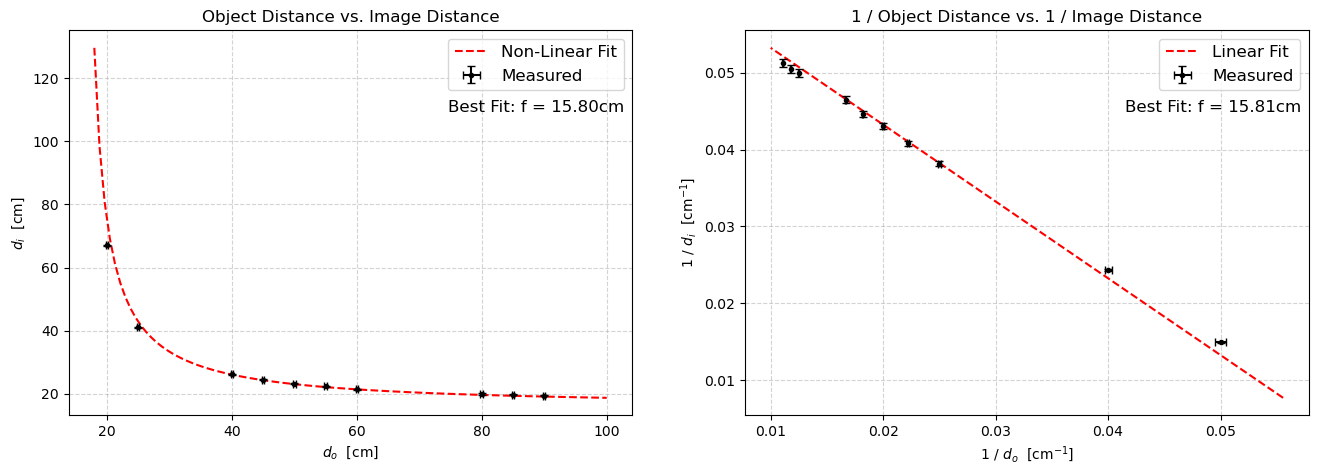

In [4]:
'''Creating figure for plot'''
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 5), gridspec_kw = {'width_ratios': [1, 1]})

'''Plot 1 -> d_o vs d_i'''
ax1.set_xlabel('$d_o$  [cm]')
ax1.set_ylabel('$d_i$  [cm]')
ax1.set_title('Object Distance vs. Image Distance')
ax1.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax1.plot(do_meas_range, img_dist_meas(output_meas.beta, do_meas_range), linestyle = 'dashed',
         color = 'red', label = 'Non-Linear Fit')
ax1.errorbar(do_meas, di_meas, xerr = do_err_meas, yerr = di_err_meas, capsize = 3, fmt = 'k.', label = 'Measured')
ax1.legend(loc = 'upper right', prop = {'size': 12})
ax1.annotate('Best Fit: f = {:.2f}cm'.format(f_meas), xy=(0.83, 0.8), xycoords='axes fraction',
             ha='center', va='center', fontsize=12)
fig.savefig('c:/Users/Tucker Knaak/Downloads/PHY206_GeometricalOptics_Lab2_MeasuredCurvefit.png',
             bbox_inches = mtransforms.Bbox([[0, 0], [0.5, 1]]).transformed(fig.transFigure - fig.dpi_scale_trans))

'''Plot 2 -> 1/d_o vs 1/d_i'''
ax2.set_xlabel('$1\ /\ d_o$  [cm$^{-1}$]')
ax2.set_ylabel('$1\ /\ d_i$  [cm$^{-1}$]')
ax2.set_title('1 / Object Distance vs. 1 / Image Distance')
ax2.grid(True, linestyle = 'dashed', color = 'darkgray', alpha = 0.5)
ax2.plot(do_invrs_range, img_dist_invrs(output_invrs.beta, do_invrs_range), linestyle = 'dashed',
         color = 'red', label = 'Linear Fit')
ax2.errorbar(do_invrs, di_invrs, xerr = do_err_invrs, yerr = di_err_invrs, capsize = 3, fmt = 'k.', label = 'Measured')
ax2.legend(loc = 'upper right', prop = {'size': 12})
ax2.annotate('Best Fit: f = {:.2f}cm'.format(f_invrs), xy=(0.83, 0.8), xycoords='axes fraction',
             ha='center', va='center', fontsize=12)
fig.savefig('c:/Users/Tucker Knaak/Downloads/PHY206_GeometricalOptics_Lab2_InverseCurvefit.png',
             bbox_inches = mtransforms.Bbox([[0.5, 0], [1, 1]]).transformed(fig.transFigure - fig.dpi_scale_trans));